In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")   # or give full path
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Text(0.5, 1.0, 'Missing Values Heatmap')

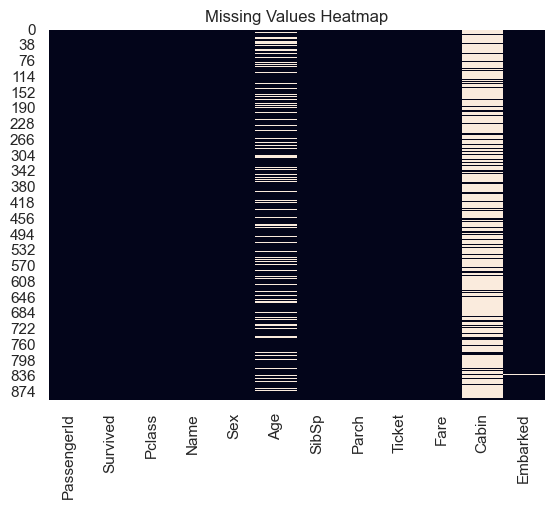

In [4]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

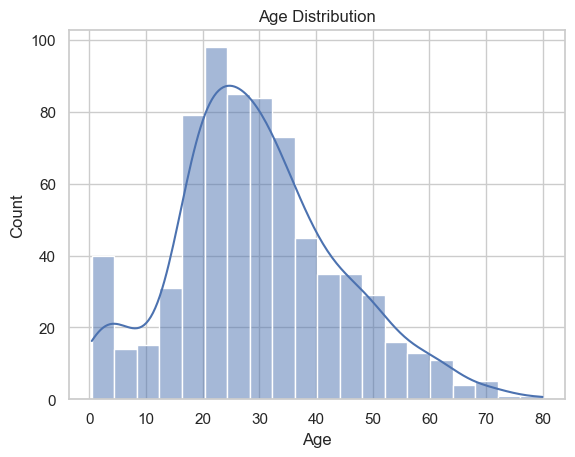

In [5]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

Text(0.5, 1.0, 'Fare Boxplot')

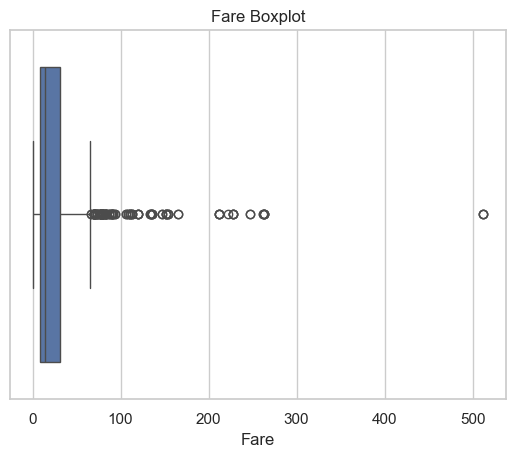

In [6]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")

Text(0.5, 1.0, 'Survival Count')

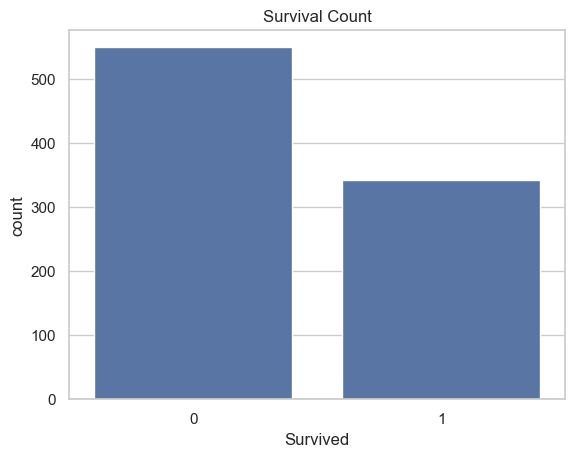

In [7]:
sns.countplot(x=df['Survived'])
plt.title("Survival Count")

Text(0.5, 1.0, 'Gender Distribution')

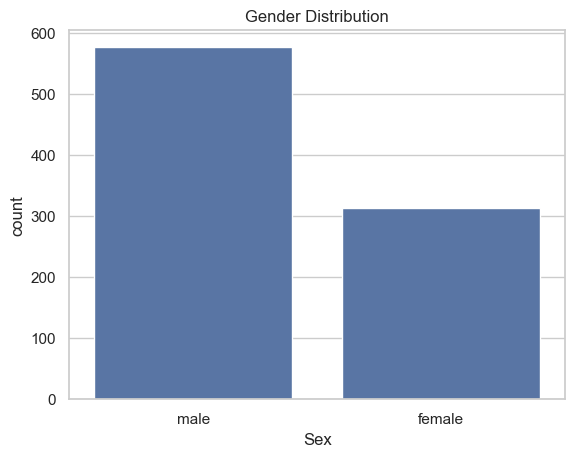

In [8]:
sns.countplot(x=df['Sex'])
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Passenger Class Distribution')

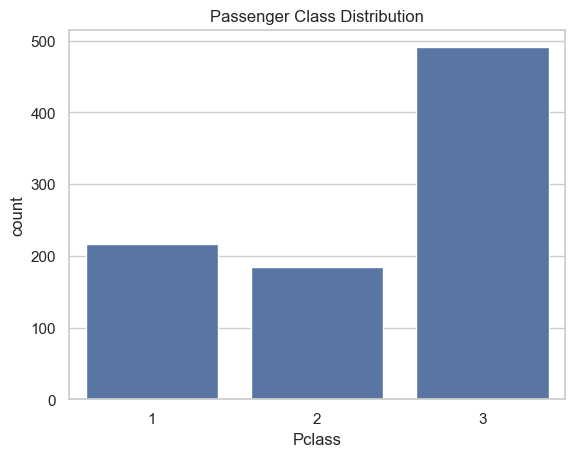

In [9]:
sns.countplot(x=df['Pclass'])
plt.title("Passenger Class Distribution")

Text(0.5, 1.0, 'Embarked Port Distribution')

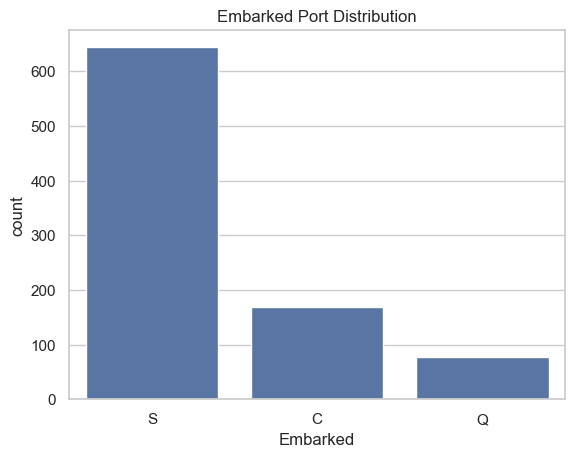

In [10]:
sns.countplot(x=df['Embarked'])
plt.title("Embarked Port Distribution")

Text(0.5, 1.0, 'Survival by Gender')

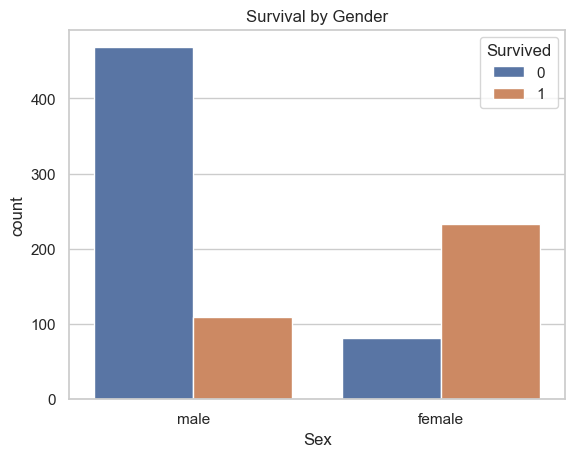

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")

Text(0.5, 1.0, 'Survival by Passenger Class')

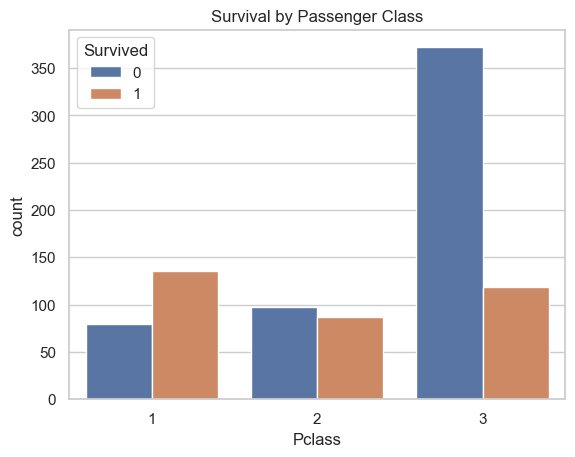

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")

Text(0.5, 1.0, 'Age vs Survival')

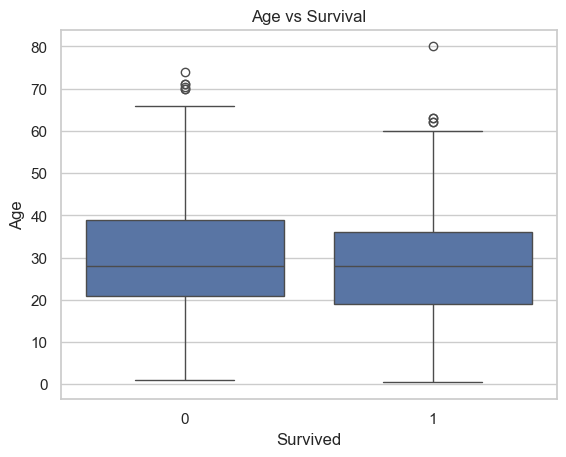

In [13]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")

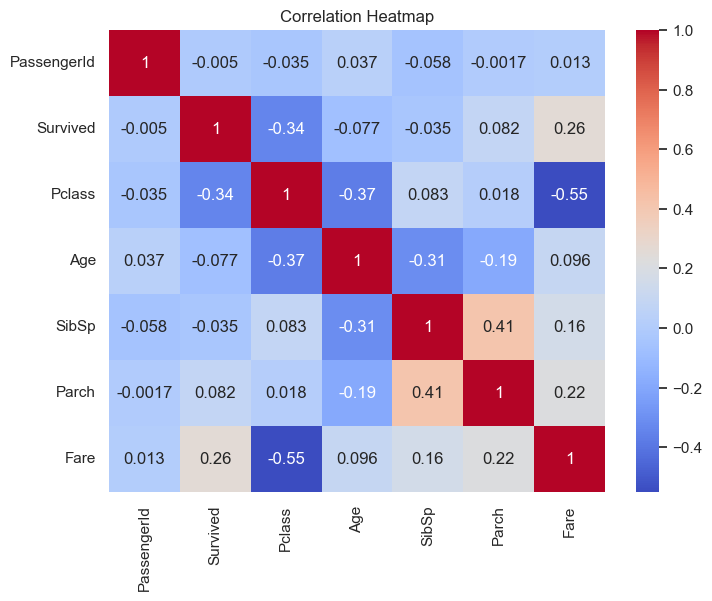

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

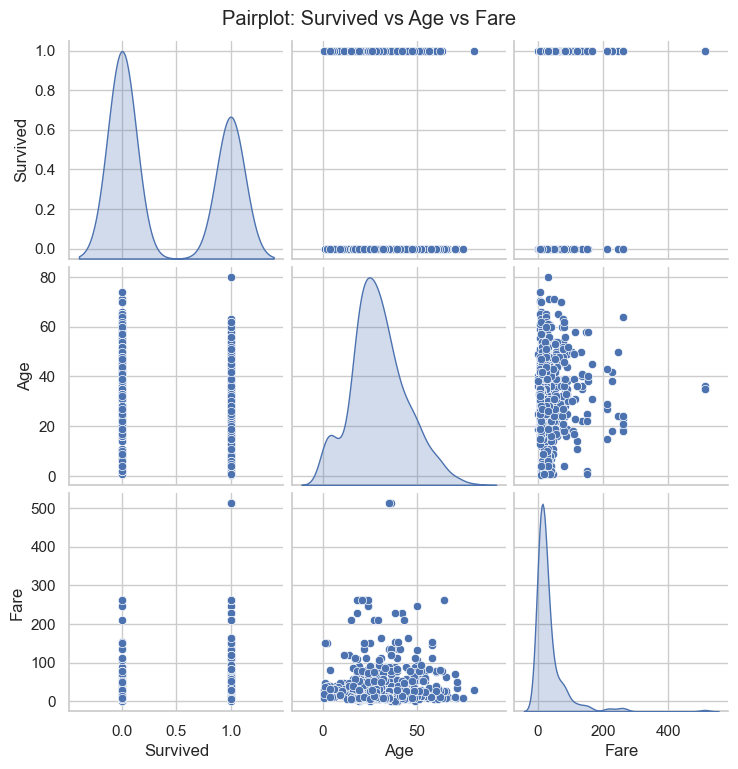

In [21]:
sns.pairplot(df[['Survived','Age','Fare']].dropna(), diag_kind='kde')
plt.suptitle("Pairplot: Survived vs Age vs Fare", y=1.02)
plt.show()

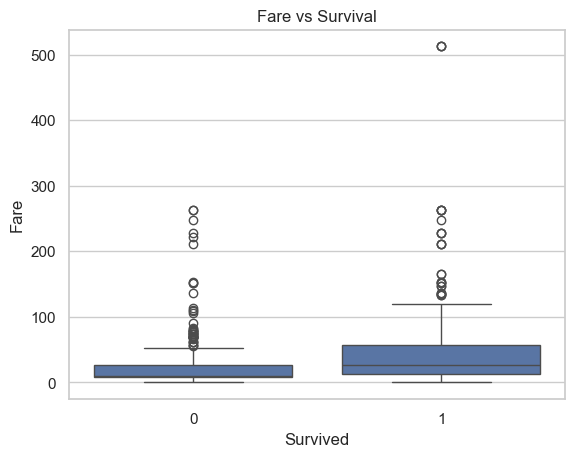

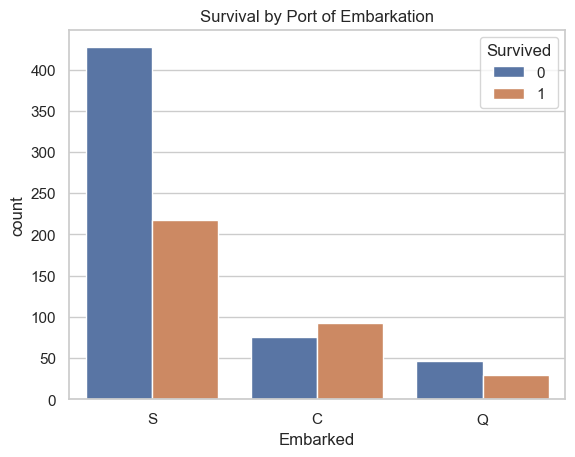

In [28]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Port of Embarkation")
plt.show()

In [ ]:
### Key Insights from Titanic EDA

- Younger passengers had higher survival chances  
- Women survived at much higher rates  
- First-class passengers saved more often  
- Fare correlated positively with survival  
- Age has missing values (need imputation)  
- Cabin data unusable for modeling  
- Embarked mostly from “S”  